<a href="https://colab.research.google.com/github/nelsonbjr/Covid19_Crisis/blob/master/COVID_19_GLOBAL_28MAR20_v2_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **OBTENDO OS DADOS**


In [1]:
import pandas as pd
import numpy as np
casos = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
casos.tail()


,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20
248,NaN,Burma,21.9162,95.9560,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8,8,10
249,Anguilla,United Kingdom,18.2206,-63.0686,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2
250,British Virgin Islands,United Kingdom,18.4207,-64.6400,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2
251,Turks and Caicos Islands,United Kingdom,21.6940,-71.7979,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,4
252,NaN,MS Zaandam,0.0000,0.0000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2


## **CASOS COVID-19 NO MUNDO**

In [2]:
casos = np.sum(casos.iloc[ : , 4 : casos.shape[1]])
casos.index = pd.DatetimeIndex(casos.index)
casos.tail()


2020-03-25    467653
2020-03-26    529591
2020-03-27    593291
2020-03-28    660706
2020-03-29    720117
dtype: int64

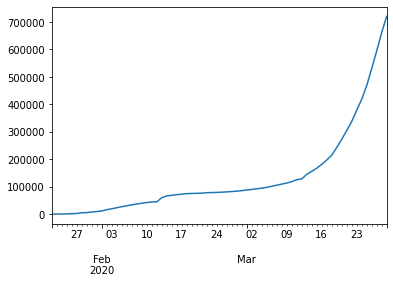

In [3]:
casos.plot()

## **MORTES POR COVID-19 NO MUNDO**



In [4]:
mortes = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv")
mortes.shape

(253, 72)

In [5]:
mortes = np.sum(mortes.iloc[ : , 4 : mortes.shape[1]])
mortes.index = pd.DatetimeIndex(mortes.index)
mortes.tail()

2020-03-25    21181
2020-03-26    23970
2020-03-27    27198
2020-03-28    30652
2020-03-29    33925
dtype: int64

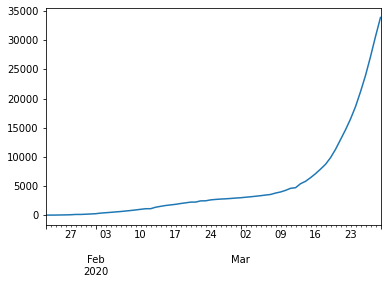

In [6]:
mortes.plot()

## **MORTALIDADE**


In [7]:
mortalidade = (mortes/casos)*100
mortalidade.tail()

2020-03-25    4.529213
2020-03-26    4.526134
2020-03-27    4.584260
2020-03-28    4.639280
2020-03-29    4.711040
dtype: float64

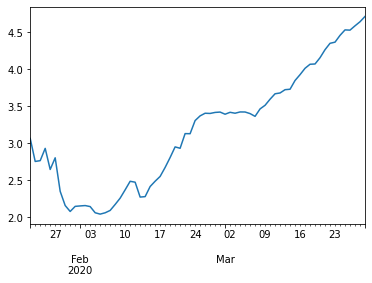

In [8]:
mortalidade.plot()

## **CARREGANDO DADOS DE PACIENTES RECUPERADOS**


In [9]:
recuperados = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv")
recuperados.shape


(239, 72)

In [10]:
recuperados = np.sum(recuperados.iloc[ : , 4 : recuperados.shape[1]])
recuperados.index = pd.DatetimeIndex(recuperados.index)
recuperados.tail()

2020-03-25    113787
2020-03-26    122150
2020-03-27    130915
2020-03-28    139415
2020-03-29    149082
dtype: int64

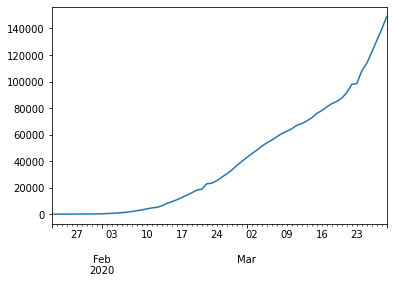

In [11]:
recuperados.plot()

In [12]:
ativos = casos - (recuperados+mortes)
ativos.tail()

2020-03-25    332685
2020-03-26    383471
2020-03-27    435178
2020-03-28    490639
2020-03-29    537110
dtype: int64

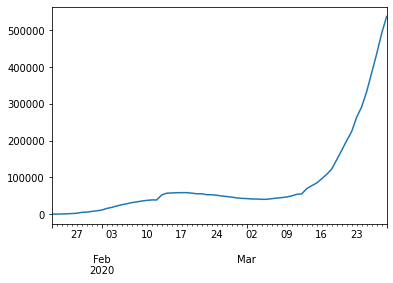

In [13]:
ativos.plot()

In [14]:
df = pd.concat([casos, ativos, recuperados, mortes], axis=1)
df.tail()

,0,1,2,3
2020-03-25,467653,332685,113787,21181
2020-03-26,529591,383471,122150,23970
2020-03-27,593291,435178,130915,27198
2020-03-28,660706,490639,139415,30652
2020-03-29,720117,537110,149082,33925


In [15]:
df.columns = (["casos", "ativos", "recuperados", "mortes"])
df.tail()

,casos,ativos,recuperados,mortes
2020-03-25,467653,332685,113787,21181
2020-03-26,529591,383471,122150,23970
2020-03-27,593291,435178,130915,27198
2020-03-28,660706,490639,139415,30652
2020-03-29,720117,537110,149082,33925


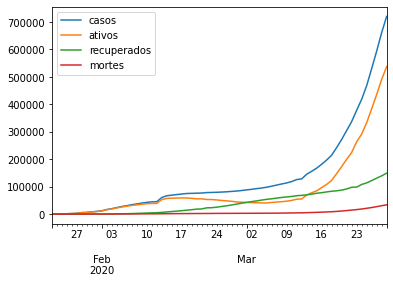

In [16]:
df.plot()

In [0]:
df = pd.concat([casos, recuperados], axis=1)
df.tail()

,0,1
2020-03-24,418045,108000
2020-03-25,467653,113787
2020-03-26,529591,122150
2020-03-27,593291,130915
2020-03-28,660706,139415


In [0]:
df.columns = (["casos", "recuperados"])
df.tail()

,casos,recuperados
2020-03-24,418045,108000
2020-03-25,467653,113787
2020-03-26,529591,122150
2020-03-27,593291,130915
2020-03-28,660706,139415


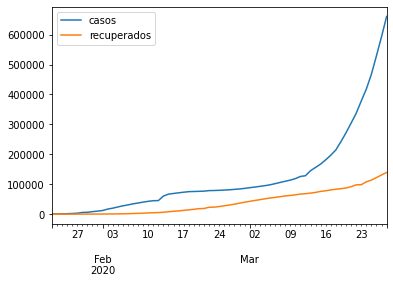

In [0]:
df.plot()

## **CALCULANDO A TAXA DE RECUPERAÇÃO** 

In [22]:
recuperacao = (recuperados/casos)*100
recuperacao.tail(30)

2020-02-29    46.252224
2020-03-01    48.338218
2020-03-02    50.497198
2020-03-03    51.947436
2020-03-04    53.795206
2020-03-05    54.957808
2020-03-06    54.876671
2020-03-07    55.134298
2020-03-08    55.266297
2020-03-09    55.017167
2020-03-10    54.294385
2020-03-11    53.229791
2020-03-12    53.231738
2020-03-13    48.380565
2020-03-14    46.523725
2020-03-15    45.405903
2020-03-16    43.006157
2020-03-17    41.014297
2020-03-18    38.782056
2020-03-19    35.041237
2020-03-20    32.135571
2020-03-21    30.122603
2020-03-22    29.054200
2020-03-23    26.002617
2020-03-24    25.834539
2020-03-25    24.331502
2020-03-26    23.064969
2020-03-27    22.065900
2020-03-28    21.100913
2020-03-29    20.702469
dtype: float64

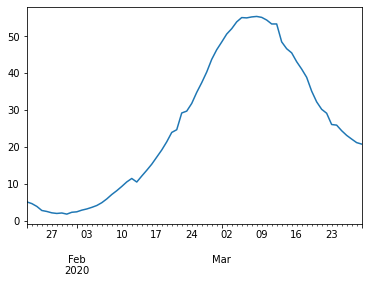

In [21]:
recuperacao.plot()